# <font style="color:rgb(50,120,229)">Bilateral Filtering</font>

A **Bilateral Filter** is nonlinear, edge-preserving and noise-reducing smoothing filter. Most smoothing filters (e.g. a Gaussian or a Box filter) have a parameter called $\sigma_s$ (the s in the subscript stands for "spatial") that determines the amount of smoothing. Often this value is closely related to the kernel size. A typical smoothing filter replaces the intensity value of a pixel by the weighted sum of its neighbors. The bigger the neighborhood, the smoother the filtered image looks. The size of the neighborhood is directly proportional to the parameter $\sigma_s$.

In edge-preserving filters, there are two competing objectives :

1. Smooth the image.

2. Don’t smooth the edges / color boundaries. 

In other words, if we want to preserve edges, we cannot simply replace the color of a pixel by the weighted sum of its neighbors. 

Consider this 3x3 image patch, shown below.

<center><img src="https://www.dropbox.com/s/l4ugj52l5phid0y/bilateralMatrix1.png?dl=1" /> </center>

You can see the values in the left column are much lower than the values in the center and the right columns. In other words, this patch is part of a vertical edge. In a typical filtering operation, we replace the center pixel by some weighted combination of all 9 pixels in this 3x3 neighborhood. However, in this case, a better idea is to filter the center pixel based on only the center and right-hand side columns so that the edge is retained and not blurred-out. 

In bilateral filtering, while calculating the contribution of any pixel to the final output, we weigh the pixels that are close in terms of intensity to the center pixel higher as compared to the pixels whose intensities are very different from the center pixels. We want to find a weight that depends on the square of the intensity difference  ($I_p$ − $I_q$)$^2$  between the center pixel q and its neighbor p. But if you are a control freak, like most AI scientists, you will want more control over your definition of intensity difference. We can redefine intensity difference as the Gaussian function 

<center><img src="https://www.dropbox.com/s/wwmneobohkaphst/bilateralEquation2.png?dl=1" /></center>

and control the meaning of intensity differences using the parameter $\sigma_r$.
 
Additionally, just like Gaussian filtering, we also want to weight the pixels that are closer to the center pixel higher than the pixels that are farther away. So, the weights should depend on $|| p − q ||$. But again, you are likely a control freak and want to control the definition of distance. How do you do that? Well, you use a Gaussian $G_{\sigma_{s}} (|| p − q ||)$ and control the meaning of distance using the parameter $\sigma_s$. 

Combining the two, a bilateral filter will output the following at center pixel q. 

<center><img src="https://www.dropbox.com/s/f3egifbpk72ga7l/bilateralEquation1.png?dl=1" /> </center>

Where, 

$W_p$ = The normalization constant

$G_{\sigma_{s}}$= Spatial Gaussian kernel

$G_{\sigma_{r}}$ = Color / Range Gaussian kernel

q = Center pixel

p = Neighboring pixel

$I_p$  = Intensity at pixel p

$I_q$ = Intensity at pixel q



If the neighborhood pixels are edges, the difference in intensity $(I_p - I_q)$ will be higher. Since the Gaussian is a decreasing function, $G_{\sigma_{r}}(I_p - I_q)$ will have lower weights for higher values. Hence, the smoothing effect will be lower for such pixels, preserving the edges. 

To conclude, for bilateral filtering, we have two parameters : $\sigma_s$ and $\sigma_r$. Just like other smoothing filters $\sigma_s$ controls amount of spatial smoothing, and $\sigma_r$ (for sigma_range) controls how dissimilar colors within the neighborhood will be averaged. A higher $\sigma_r$ results in larger regions of constant color. Let’s have a look at the code. 

## <font style="color:rgb(50,120,229)">Bilateral Filter in OpenCV</font>

First, here is the [**`Bilateral filter`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed) in OpenCV. 

### <font style="color:rgb(8,133,37)">Function Syntax</font>

```python
dst	=	cv2.bilateralFilter(	src, d, sigmaColor, sigmaSpace[, dst[, borderType]]	)
```

**Parameters**

- **`src`**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **`dst`**	Destination image of the same size and type as src .
- **`d`**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **`sigmaColor`**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **`sigmaSpace`**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **`borderType`**	border mode used to extrapolate pixels outside of the image, see BorderTypes

The tutorial below shows an example usage and results for a bilateral filter.

In [2]:
import cv2
import numpy as np
from dataPath import DATA_PATH
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread(DATA_PATH+"images/gaussian-noise.png")

# Check for invalid input
if img is None:  
    print("Could not open or find the image")

First we specify the parameters used in the bilateral filter. The first parameter we specify is the diameter of the pixel neighbourhood that we will use for filtering. Next we specify the standard deviations in color space and coordinate space. The filtered image is stored in numpy array ‘bilateralFiltered’.

Text(0.5, 1.0, 'Bilateral Blur Result')

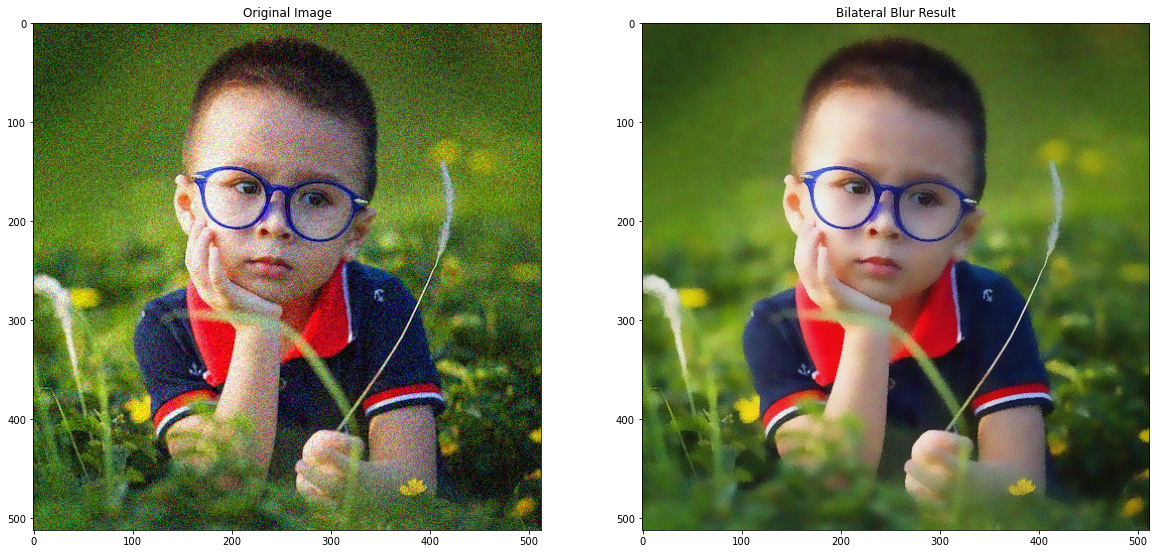

In [4]:
# diameter of the pixel neighbourhood used during filtering
dia=15;

# Larger the value the distant colours will be mixed together 
# to produce areas of semi equal colors
sigmaColor=80

# Larger the value more the influence of the farther placed pixels 
# as long as their colors are close enough
sigmaSpace=80

#Apply bilateralFilter
result = cv2.bilateralFilter(img, dia, sigmaColor, sigmaSpace)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("Bilateral Blur Result")